# Exploratory Analysis Exercises

- Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Answer those questions through a mix of statistical tests and visualizations.


In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import wrangle_excs as wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.shape

(69523, 24)

In [4]:
wrangle.nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,0,0.0,69523


In [5]:
wrangle.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
bathroomcnt,0,0.0
bedroomcnt,0,0.0
buildingqualitytypeid,0,0.0
calculatedfinishedsquarefeet,0,0.0
fips,0,0.0
latitude,0,0.0
longitude,0,0.0
lotsizesquarefeet,0,0.0
rawcensustractandblock,0,0.0
regionidcity,0,0.0


In [6]:
wrangle.summarize(df)



Dataframe head: 
|    |   bathroomcnt |   bedroomcnt |   buildingqualitytypeid |   calculatedfinishedsquarefeet |   fips |    latitude |    longitude |   lotsizesquarefeet |   rawcensustractandblock |   regionidcity |   regionidcounty |   regionidzip |   roomcnt |   unitcnt |   yearbuilt |   structuretaxvaluedollarcnt |   taxvaluedollarcnt |   assessmentyear |   landtaxvaluedollarcnt |   taxamount |   logerror | transactiondate   | heatingorsystemdesc   | county   |
|---:|--------------:|-------------:|------------------------:|-------------------------------:|-------:|------------:|-------------:|--------------------:|-------------------------:|---------------:|-----------------:|--------------:|----------:|----------:|------------:|-----------------------------:|--------------------:|-----------------:|------------------------:|------------:|-----------:|:------------------|:----------------------|:---------|
|  0 |           3.5 |            4 |                       6 |          

                              num_rows_missing  percent_rows_missing
bathroomcnt                                  0                   0.0
bedroomcnt                                   0                   0.0
buildingqualitytypeid                        0                   0.0
calculatedfinishedsquarefeet                 0                   0.0
fips                                         0                   0.0
latitude                                     0                   0.0
longitude                                    0                   0.0
lotsizesquarefeet                            0                   0.0
rawcensustractandblock                       0                   0.0
regionidcity                                 0                   0.0
regionidcounty                               0                   0.0
regionidzip                                  0                   0.0
roomcnt                                      0                   0.0
unitcnt                           

In [7]:
df = df.rename(columns = { 'bedroomcnt':'bedrooms', 
                              'bathroomcnt':'bathrooms', 
                              'calculatedfinishedsquarefeet':'sq_footage',
                              'taxvaluedollarcnt':'tax_value', 
                              'yearbuilt':'yr_built'
                             }) 

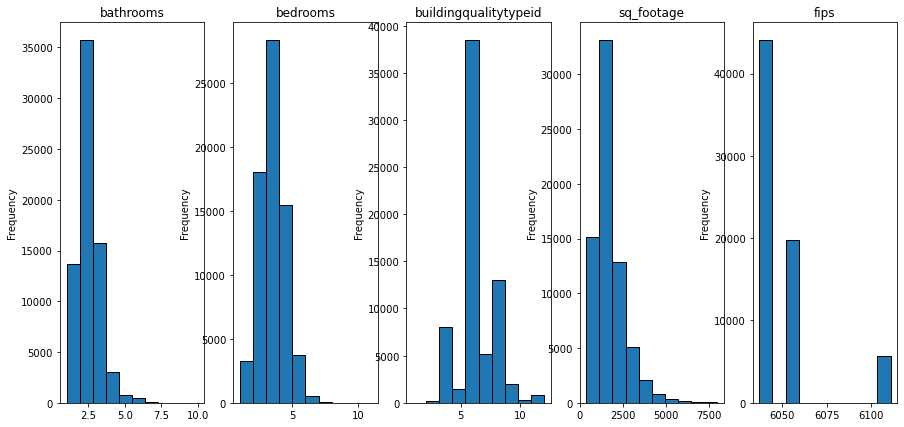

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(15, 7))

for ax, col in zip(axs, df.select_dtypes('number')):
    df[col].plot.hist(ax=ax, title=col, ec='black')

In [9]:
#Binning square footage for comparison and visualization purposes
df['sq_footage_bins'] = pd.cut(df.sq_footage, [0, 1000, 2000,3000,4000, 10000])
df.head()

,bathrooms,bedrooms,buildingqualitytypeid,sq_footage,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,structuretaxvaluedollarcnt,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,sq_footage_bins
0,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,None,Orange,"(3000, 4000]"
1,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,None,Ventura,"(1000, 2000]"
2,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,None,Orange,"(1000, 2000]"
3,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central,Los Angeles,"(2000, 3000]"
4,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central,Los Angeles,"(1000, 2000]"


### Before exploring data, will need to split data into train, validate and test so that we only explore on train.

In [10]:
train, validate, test = wrangle.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((41713, 25), (13905, 25), (13905, 25))

### Question 1.  Does logerror differ across square feet?

<AxesSubplot:title={'center':'Is there a relationship between logerror and square feet?'}, xlabel='logerror', ylabel='sq_footage'>

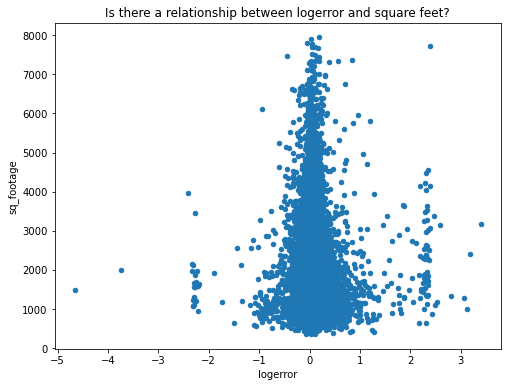

In [11]:
train.plot.scatter(
    x="logerror",
    y="sq_footage",
    title='Is there a relationship between logerror and square feet?',
    figsize=(8, 6),
)

<AxesSubplot:>

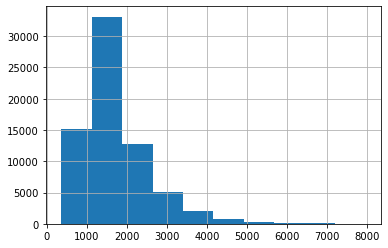

In [12]:
df.sq_footage.hist()

<AxesSubplot:title={'center':'Distribution of sq_footage_bin'}>

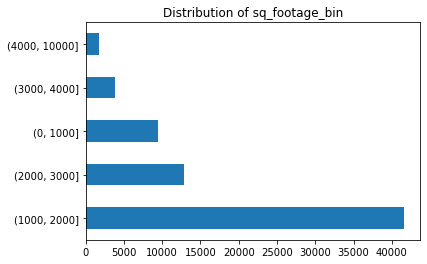

In [13]:
df.sq_footage_bins.value_counts().plot.barh(title='Distribution of sq_footage_bin')

<AxesSubplot:xlabel='sq_footage_bins', ylabel='logerror'>

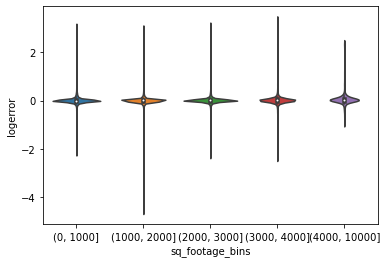

In [15]:
sns.violinplot(data=train, y='logerror', x='sq_footage_bins')

### Levene's Test: test for equal variance
$H_0$: there is no difference in logerror variance between the square footage

$H_a$: there is a difference in logerror variance between the square footage

In [17]:
stats.levene(
    train[train.sq_footage <= 1000].logerror,
    train[train.sq_footage > 1000].logerror,
)

LeveneResult(statistic=19.873647889493125, pvalue=8.29483482265668e-06)

In [16]:
stats.levene(
    train[train.sq_footage <= 2000].logerror,
    train[train.sq_footage > 2000].logerror,
)

LeveneResult(statistic=7.805002630651027, pvalue=0.005212554536202368)

In [18]:
stats.levene(
    train[train.sq_footage <= 3000].logerror,
    train[train.sq_footage > 3000].logerror,
)

LeveneResult(statistic=65.92252041692265, pvalue=4.817430450798007e-16)

In [19]:
stats.levene(
    train[train.sq_footage <= 4000].logerror,
    train[train.sq_footage > 4000].logerror,
)

LeveneResult(statistic=56.498176826913685, pvalue=5.7374573898943e-14)

#### Conclusion:
We reject the null hypothesis that the variance in logerror is the same for all square footages.
The variance is not equal.

In [37]:
stats.ttest_ind(
    train[train.sq_footage <= 1000].logerror,
    train[train.sq_footage > 1000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-0.7684529751392281, pvalue=0.44224177385613017)

In [22]:
stats.ttest_ind(
    train[train.sq_footage <= 2000].logerror,
    train[train.sq_footage > 2000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-6.917209432002289, pvalue=4.767405507316598e-12)

In [23]:
stats.ttest_ind(
    train[train.sq_footage <= 3000].logerror,
    train[train.sq_footage > 3000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-6.239001107024055, pvalue=4.908513622819257e-10)

In [24]:
stats.ttest_ind(
    train[train.sq_footage <= 4000].logerror,
    train[train.sq_footage > 4000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-5.522475216240832, pvalue=4.228038615045587e-08)

### Conclusion:
We reject the null hypothesis that the logerror is the same for square footages above 1000 square feet.

### Question 2. Does  logerror differ across county?


In [25]:
df.county.value_counts()

Los Angeles    44028
Orange         19801
Ventura         5694
Name: county, dtype: int64

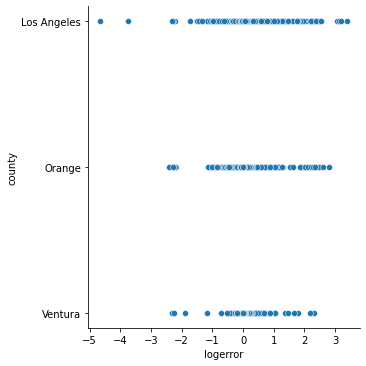

In [31]:
sns.relplot(data=train, x='logerror', y='county')

#### Levene's Test: test for equal variance
$H_0$: there is no difference in logerror variance between the counties
 
𝐻𝑎 : there is a difference in logerror variance between the counties


In [33]:
stats.levene(
    train[train.county == 'Los Angeles'].logerror,
    train[train.sq_footage != 'Los Angeles'].logerror,
)

LeveneResult(statistic=7.377499706667546, pvalue=0.006606155599872568)

In [34]:
stats.levene(
    train[train.county == 'Ventura'].logerror,
    train[train.sq_footage != 'Ventura'].logerror,
)

LeveneResult(statistic=12.250728234008855, pvalue=0.0004655257549702561)

In [36]:
stats.levene(
    train[train.county == 'Orange'].logerror,
    train[train.sq_footage != 'Orange'].logerror,
)

LeveneResult(statistic=7.045968552802632, pvalue=0.007946733609106237)

### Conclusion:
We reject the null hypothesis that the variance in logerror is the same for all counties.
The variance is not equal.

In [41]:
stats.ttest_ind(
    df.query('county == "Los Angeles"').logerror,
    df.query('county == "Orange"').logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-4.2684434157987665, pvalue=1.9739764397644962e-05)

In [46]:
stats.ttest_ind(
    df.query('county == "Ventura"').logerror,
    df.query('county == "Orange"').logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-2.2386319506170236, pvalue=0.025199549134029806)

In [47]:
stats.ttest_ind(
    df.query('county == "Los Angeles"').logerror,
    df.query('county == "Ventura"').logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-0.511233643273048, pvalue=0.6092028784480675)

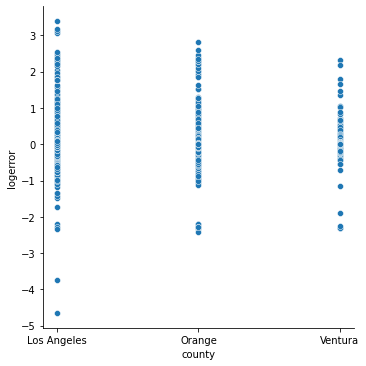

In [45]:
sns.relplot(data=train, y='logerror', x='county')

### Conclusion:
We reject the null hypothesis that the logerror is the same for all counties.

### Question 3. Does  logerror differ across transaction date?

<AxesSubplot:title={'center':'Is there a relationship between logerror and transaction date?'}, xlabel='transactiondate', ylabel='logerror'>

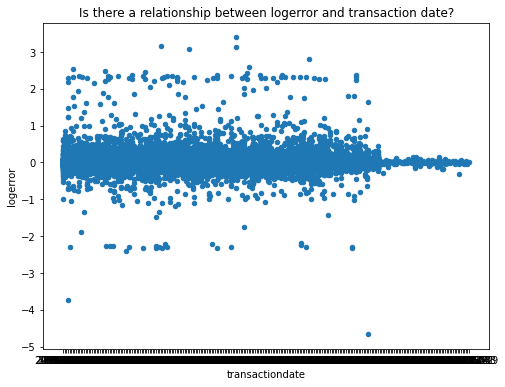

In [49]:
train.plot.scatter(
    y="logerror",
    x="transactiondate",
    title='Is there a relationship between logerror and transaction date?',
    figsize=(8, 6),
)

<AxesSubplot:>

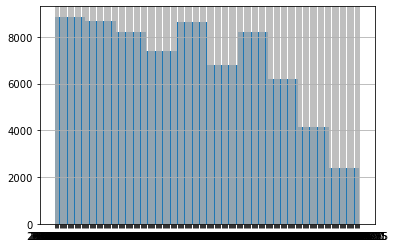

In [50]:
df.transactiondate.hist()

In [62]:
train['transactiondate'] = pd.to_datetime(train['transactiondate'])
train['month'] = pd.DatetimeIndex(train['transactiondate']).month
train.head()

,bathrooms,bedrooms,buildingqualitytypeid,sq_footage,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,sq_footage_bins,transaction_month,month
42186,2.0,4.0,8.0,2064.0,6037.0,34017722.0,-117851610.0,8025.0,6.037403e+07,34636.0,...,2016.0,360856.0,7528.65,-0.005855,2017-06-01,Central,Los Angeles,"(2000, 3000]",,6
17405,2.0,4.0,6.0,1920.0,6059.0,33895330.0,-117879284.0,7632.0,6.059012e+07,24812.0,...,2016.0,362410.0,5301.98,0.062575,2017-03-16,Forced air,Orange,"(1000, 2000]",,3
15241,2.0,3.0,6.0,1425.0,6037.0,33871501.0,-118383982.0,2503.0,6.037621e+07,33612.0,...,2016.0,33520.0,1573.60,0.042117,2017-03-08,Central,Los Angeles,"(1000, 2000]",,3
22227,1.0,2.0,4.0,838.0,6037.0,34216523.0,-118443856.0,6047.0,6.037120e+07,12447.0,...,2016.0,92783.0,2052.88,-0.009249,2017-03-31,Floor/Wall,Los Angeles,"(0, 1000]",,3
76503,2.0,2.0,6.0,935.0,6059.0,33715500.0,-118050000.0,7313.0,6.059099e+07,25218.0,...,2016.0,304620.0,4561.14,0.005929,2017-09-14,None,Orange,"(0, 1000]",,9


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41713 entries, 42186 to 4990
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   bathrooms                   41713 non-null  float64       
 1   bedrooms                    41713 non-null  float64       
 2   buildingqualitytypeid       41713 non-null  float64       
 3   sq_footage                  41713 non-null  float64       
 4   fips                        41713 non-null  float64       
 5   latitude                    41713 non-null  float64       
 6   longitude                   41713 non-null  float64       
 7   lotsizesquarefeet           41713 non-null  float64       
 8   rawcensustractandblock      41713 non-null  float64       
 9   regionidcity                41713 non-null  float64       
 10  regionidcounty              41713 non-null  float64       
 11  regionidzip                 41713 non-null  float64

In [67]:
#Binning transactiondate for comparison and visualization purposes
train['month_bins'] = pd.cut(train.month, [0,3,6,9,12])
train.head()

,bathrooms,bedrooms,buildingqualitytypeid,sq_footage,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,sq_footage_bins,month,month_bins
42186,2.0,4.0,8.0,2064.0,6037.0,34017722.0,-117851610.0,8025.0,6.037403e+07,34636.0,...,2016.0,360856.0,7528.65,-0.005855,2017-06-01,Central,Los Angeles,"(2000, 3000]",6,"(3, 6]"
17405,2.0,4.0,6.0,1920.0,6059.0,33895330.0,-117879284.0,7632.0,6.059012e+07,24812.0,...,2016.0,362410.0,5301.98,0.062575,2017-03-16,Forced air,Orange,"(1000, 2000]",3,"(0, 3]"
15241,2.0,3.0,6.0,1425.0,6037.0,33871501.0,-118383982.0,2503.0,6.037621e+07,33612.0,...,2016.0,33520.0,1573.60,0.042117,2017-03-08,Central,Los Angeles,"(1000, 2000]",3,"(0, 3]"
22227,1.0,2.0,4.0,838.0,6037.0,34216523.0,-118443856.0,6047.0,6.037120e+07,12447.0,...,2016.0,92783.0,2052.88,-0.009249,2017-03-31,Floor/Wall,Los Angeles,"(0, 1000]",3,"(0, 3]"
76503,2.0,2.0,6.0,935.0,6059.0,33715500.0,-118050000.0,7313.0,6.059099e+07,25218.0,...,2016.0,304620.0,4561.14,0.005929,2017-09-14,None,Orange,"(0, 1000]",9,"(6, 9]"


<AxesSubplot:title={'center':'Distribution of month_bin'}>

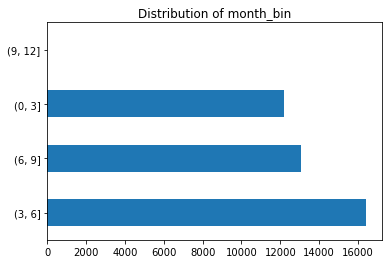

In [69]:
train.month_bins.value_counts().plot.barh(title='Distribution of month_bin')

<AxesSubplot:xlabel='month_bins', ylabel='logerror'>

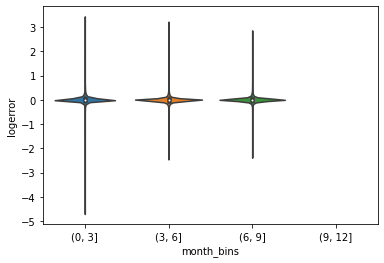

In [70]:
sns.violinplot(data=train, y='logerror', x='month_bins')

<AxesSubplot:title={'center':'Is there a relationship between logerror and month?'}, xlabel='month', ylabel='logerror'>

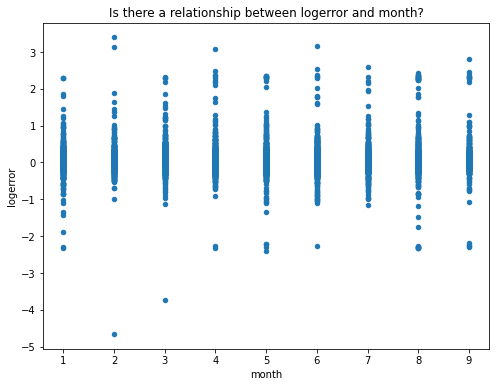

In [75]:
train.plot.scatter(
    y="logerror",
    x="month",
    title='Is there a relationship between logerror and month?',
    figsize=(8, 6),
)

### Levene's Test: test for equal variance
$H_0$: there is no difference in logerror variance between the transaction months before and after June

$H_a$: there is a difference in logerror variance between the transaction months before and after June

In [71]:
stats.levene(
    train[train.month <= 6].logerror,
    train[train.month > 6].logerror,
)

LeveneResult(statistic=0.269531192027722, pvalue=0.6036491806083623)

In [72]:
# We fail to reject the null hypothesis that there is no difference in logerror variance between the 
#transaction months before and after June.  The variance is equal. 

### Are the logerror and the month of the transaction independent of each other?

$H_0$ : The logerror for sales in or before June is the same that logerror for sales after June.

$H_a$ : The logerror for sales in or before June is the not same that logerror for sales after June.

In [74]:
stats.ttest_ind(
   train[train.month <= 6].logerror,
    train[train.month > 6].logerror,
    equal_var=True,
)

Ttest_indResult(statistic=-2.604794256731223, pvalue=0.009196205472719736)

### Conclusion:
We reject the null hypothesis that tThe logerror for sales in or before June is the same that logerror for sales after June.he logerror for sales in or before June is the same that logerror for sales after June.

### Question 4.  If we control for month, does logerror differ across county?
1. Viz logerror by county for each month bin

2. Analyze each month bin separately

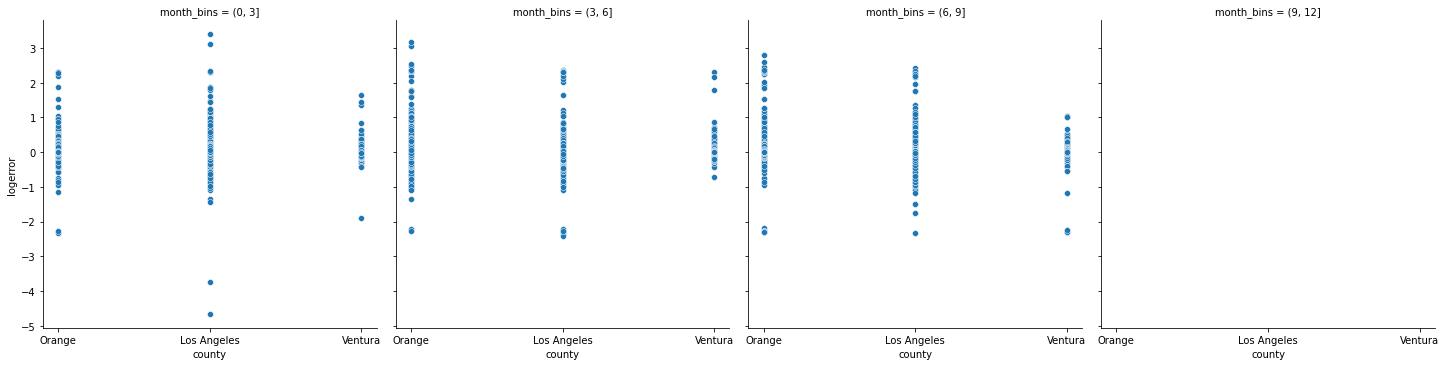

In [78]:
sns.relplot(data=train, y='logerror', x='county', col='month_bins')

In [79]:
# Logerror does not seem to vary much by month or county

Text(0.5, 1.0, 'Does county acccount for upper vs lower\nlogerror in square footage for sales before July?')

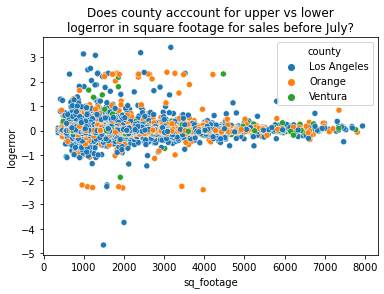

In [90]:
sns.scatterplot(
    x='sq_footage',
    y='logerror',
    data=train[train.month <= 6],
    hue='county',
)
plt.title("Does county acccount for upper vs lower\nlogerror in square footage for sales before July?")

Text(0.5, 1.0, 'Does county account for upper vs lower\n logerror in the square footage?')

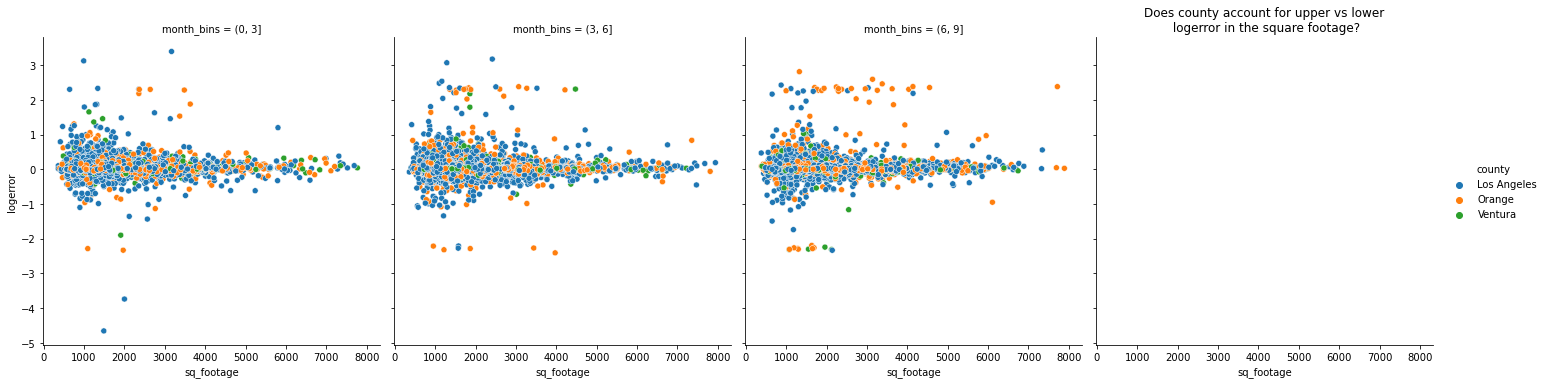

In [94]:
sns.relplot(
    x='sq_footage',
    y='logerror',
    data=train,
    hue='county',
    col='month_bins',
)
plt.title("Does county account for upper vs lower\n logerror in the square footage?")

In [99]:
corr =  train.corr(method='pearson')

<AxesSubplot:>

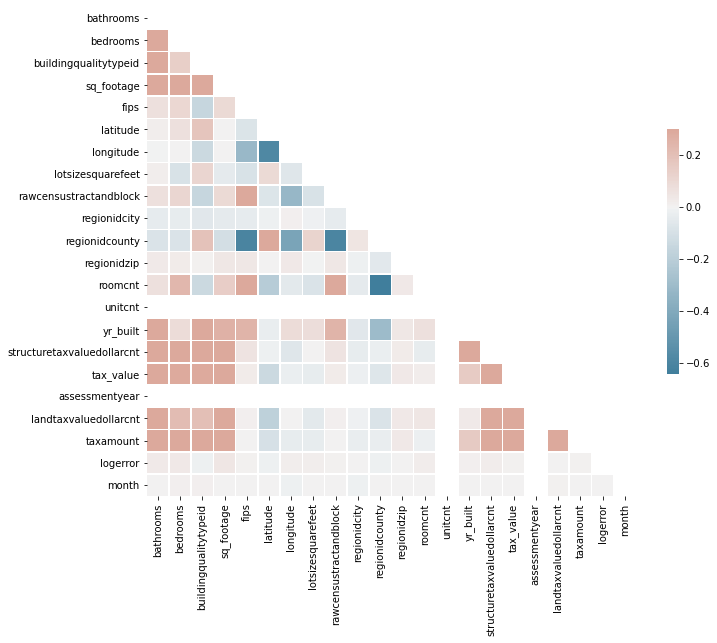

In [101]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [108]:
corr_log = train.corrwith(train["logerror"])
corr_log.max

<bound method NDFrame._add_numeric_operations.<locals>.max of bathrooms                     0.031117
bedrooms                      0.035710
buildingqualitytypeid        -0.010342
sq_footage                    0.046396
fips                          0.007807
latitude                     -0.013756
longitude                     0.013550
lotsizesquarefeet             0.016433
rawcensustractandblock        0.007858
regionidcity                  0.004779
regionidcounty               -0.016416
regionidzip                   0.003927
roomcnt                       0.020550
unitcnt                            NaN
yr_built                      0.011524
structuretaxvaluedollarcnt    0.022042
tax_value                     0.008494
assessmentyear                     NaN
landtaxvaluedollarcnt         0.000064
taxamount                     0.006330
logerror                      1.000000
month                         0.002138
dtype: float64>

In [111]:
print(corr_log.sort_values(ascending=False))

logerror                      1.000000
sq_footage                    0.046396
bedrooms                      0.035710
bathrooms                     0.031117
structuretaxvaluedollarcnt    0.022042
roomcnt                       0.020550
lotsizesquarefeet             0.016433
longitude                     0.013550
yr_built                      0.011524
tax_value                     0.008494
rawcensustractandblock        0.007858
fips                          0.007807
taxamount                     0.006330
regionidcity                  0.004779
regionidzip                   0.003927
month                         0.002138
landtaxvaluedollarcnt         0.000064
buildingqualitytypeid        -0.010342
latitude                     -0.013756
regionidcounty               -0.016416
unitcnt                            NaN
assessmentyear                     NaN
dtype: float64


### Question 5: Does logerror differ for different number of bedrooms?

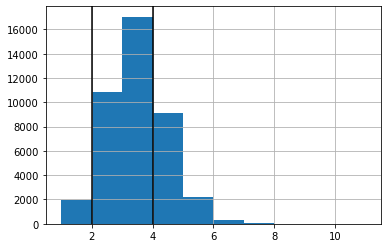

In [126]:


ax = train.bedrooms.hist()
ax.axvline(2, color='black')
ax.axvline(4, color='black')

<AxesSubplot:title={'center':'Is there a relationship between logerror and bedrooms?'}, xlabel='bedrooms', ylabel='logerror'>

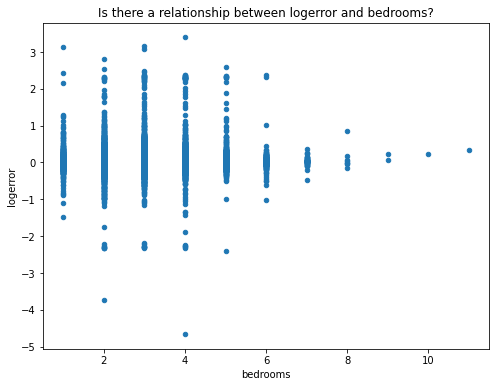

In [112]:
train.plot.scatter(
    y="logerror",
    x="bedrooms",
    title='Is there a relationship between logerror and bedrooms?',
    figsize=(8, 6),
)

<AxesSubplot:xlabel='bedrooms', ylabel='logerror'>

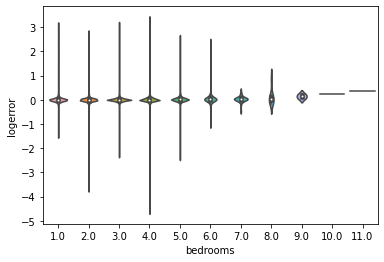

In [114]:
sns.violinplot(data=train, y='logerror', x='bedrooms')

### Levene's Test: test for equal variance
$H_0$: there is no difference in logerror variance for different number of bedrooms

$H_a$: there is a difference in logerror variance different number of bedrooms

In [116]:
stats.levene(
    train[train.bedrooms <= 5].logerror,
    train[train.month > 5].logerror,
)

LeveneResult(statistic=0.3585145570979588, pvalue=0.5493346118543523)

In [117]:
# We fail to reject the null hypothesis that there is no difference in logerror variance for different number of bedrooms.
#The variance is equal. 

### Are the logerror and properties with  4  bedrooms independent of each other?

$H_0$ : The logerror is the same for properties with 4 bedrooms or less as with those with more than 5 bedrooms.

$H_a$ : The logerror is not the same for properties with 4 bedrooms or less as with those with more than 5 bedrooms.

In [120]:
stats.ttest_ind(
   train[train.bedrooms <= 4].logerror,
    train[train.bedrooms > 4].logerror,
    equal_var=True,
)

Ttest_indResult(statistic=-7.161593347531976, pvalue=8.106024505956789e-13)

### Conclusion:
We reject the null hypothesis that the logerror is the same for properties with 4 bedrooms or less as with those with more than 5 bedrooms. The logerror is not the same for properties with 4 bedrooms or less as with those with more than 5 bedrooms.